### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import proportion

### Menghitung Jumlah Sampel

In [2]:
import statsmodels.formula.api as smf
from scipy.stats import norm

In [3]:
alpha=0.05
beta=0.2
effect_size = 0.01
sigma = 0.15
z_alpha = norm.ppf(alpha/2)
z_beta = norm.ppf(beta)
n = (2*((z_alpha+z_beta)**2)*(sigma**2))/(effect_size**2)
print(f"Jumlah sampel yang diperlukan untuk tiap varian: {n:.2f}")
print(f"Jumlah sampel yang diperlukan untuk dua varian: {n*2:.2f}")

Jumlah sampel yang diperlukan untuk tiap varian: 3532.00
Jumlah sampel yang diperlukan untuk dua varian: 7063.99


### Import Data

In [4]:
df = pd.read_csv("CASE3.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [6]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [7]:
df.shape

(8077, 9)

### Handling missing value

In [8]:
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

### Handling Duplicated Data

In [9]:
# Checking duplicate data
df.duplicated(['auction_id']).sum()

0

### Data Distribution

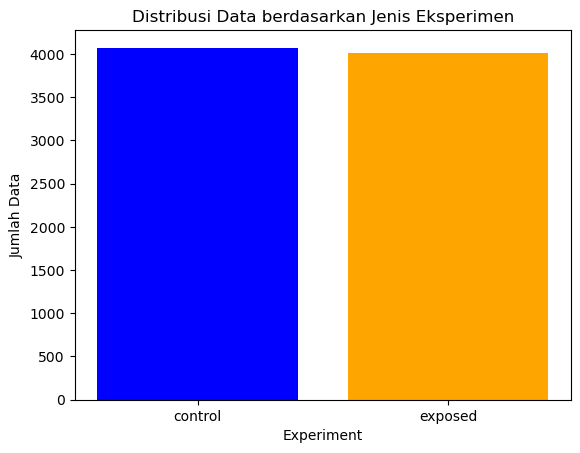

In [10]:
experiment_counts = df['experiment'].value_counts()

plt.bar(experiment_counts.index, experiment_counts.values, color=['blue', 'orange'])
plt.xlabel('Experiment')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Data berdasarkan Jenis Eksperimen')

plt.show()

In [11]:
experiment_counts

control    4071
exposed    4006
Name: experiment, dtype: int64

In [12]:
#Mengubah kolom date menjadi tipe data date time
df["date"]=pd.to_datetime(df["date"])

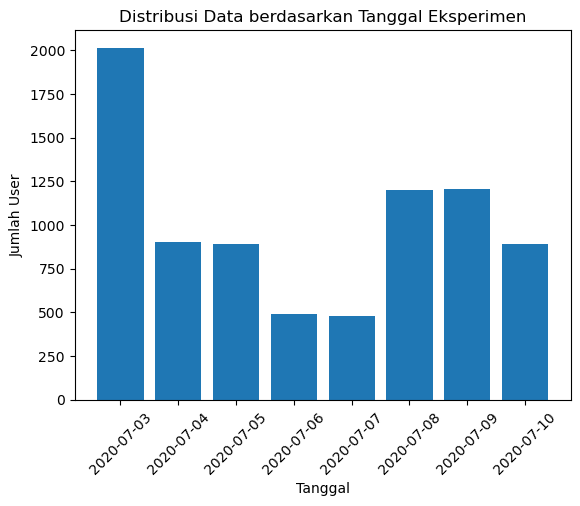

In [13]:
date_counts = df['date'].value_counts()
plt.bar(date_counts.index, date_counts.values)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah User')
plt.title('Distribusi Data berdasarkan Tanggal Eksperimen')
plt.xticks(rotation=45)
plt.show()

In [14]:
date_counts

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

In [15]:
#Menampilkan date_counts dalam format persentase
total_count = date_counts.sum()
date_counts_percentages = (date_counts / total_count) * 100
print(date_counts_percentages.round(2))

2020-07-03    24.95
2020-07-09    14.96
2020-07-08    14.83
2020-07-04    11.18
2020-07-10    11.06
2020-07-05    11.02
2020-07-06     6.07
2020-07-07     5.94
Name: date, dtype: float64


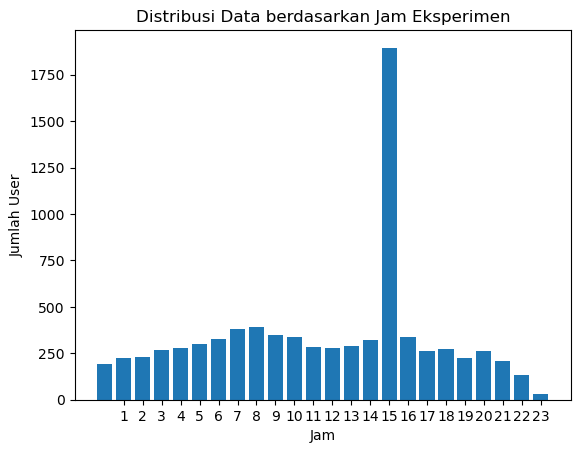

In [16]:
hour_counts = df['hour'].value_counts()
plt.bar(hour_counts.index, hour_counts.values)
plt.xticks(range(1, 24))
plt.xlabel('Jam')
plt.ylabel('Jumlah User')
plt.title('Distribusi Data berdasarkan Jam Eksperimen')
plt.show()

In [17]:
hour_counts

15    1895
8      394
7      381
9      346
10     336
16     335
6      327
14     319
5      302
13     290
11     282
4      281
12     278
18     273
3      266
20     264
17     263
2      230
19     227
1      222
21     206
0      194
22     135
23      31
Name: hour, dtype: int64

In [18]:
#Menampilkan hour_counts dalam format persentase
total_hour_count = hour_counts.sum()
hour_counts_percentages = (hour_counts / total_hour_count) * 100
print(hour_counts_percentages.round(2))

15    23.46
8      4.88
7      4.72
9      4.28
10     4.16
16     4.15
6      4.05
14     3.95
5      3.74
13     3.59
11     3.49
4      3.48
12     3.44
18     3.38
3      3.29
20     3.27
17     3.26
2      2.85
19     2.81
1      2.75
21     2.55
0      2.40
22     1.67
23     0.38
Name: hour, dtype: float64


In [19]:
by_date_hour = df.groupby(['date', 'hour'])['auction_id'].count()

In [20]:
by_date_hour.sort_values(ascending=False)

date        hour
2020-07-03  15      1546
2020-07-08  20       126
            15       125
            18       116
            16       115
                    ... 
2020-07-05  23         2
2020-07-07  23         2
2020-07-06  22         1
2020-07-03  21         1
            19         1
Name: auction_id, Length: 168, dtype: int64

In [21]:
df["device_make"].value_counts()

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
Samsung SM-G925I          1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 269, dtype: int64

In [22]:
df["platform_os"].value_counts()

6    7648
5     428
7       1
Name: platform_os, dtype: int64

In [23]:
df["browser"].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

### Penyeragaman Data

In [24]:
#Membuat function untuk mengelompokkan browser
def browser(df):
    df['browser_type'] = df['browser'].apply(lambda x: 'Chrome' if x in ['Chrome Mobile', 'Chrome Mobile WebView', 'Chrome Mobile iOS', 'Chrome'] else (
        'Samsung Internet' if x == 'Samsung Internet' else (
            'Facebook' if x == 'Facebook' else (
                'Safari' if x in ['Mobile Safari', 'Mobile Safari UI/WKWebView'] else 'Others'))))
    return df

df = browser(df)

In [25]:
browser_type_counts = df["browser_type"].value_counts()

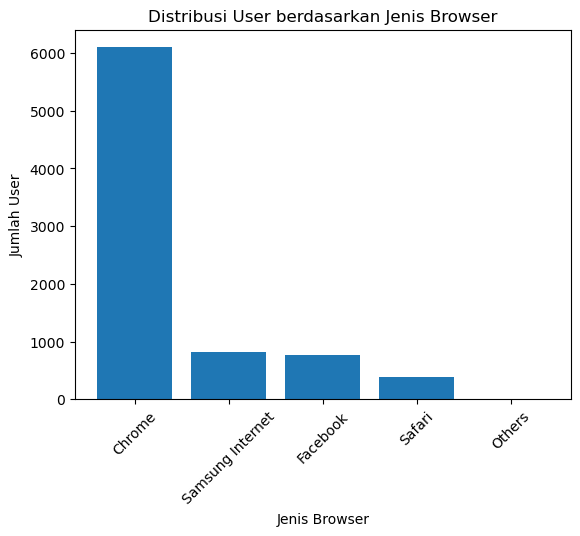

In [26]:
plt.bar(browser_type_counts.index, browser_type_counts.values)
plt.xlabel('Jenis Browser')
plt.ylabel('Jumlah User')
plt.title('Distribusi User berdasarkan Jenis Browser')
plt.xticks(rotation=45)
plt.show()

In [27]:
browser_type_counts

Chrome              6097
Samsung Internet     824
Facebook             764
Safari               381
Others                11
Name: browser_type, dtype: int64

In [28]:
total_browser_count = browser_type_counts.sum()
browser_counts_percentages = (browser_type_counts / total_browser_count) * 100
print(browser_counts_percentages.round(2))

Chrome              75.49
Samsung Internet    10.20
Facebook             9.46
Safari               4.72
Others               0.14
Name: browser_type, dtype: float64


In [29]:
#Membuat kolom baru untuk mengelompokkan user yang mengisi BIO questionnaire dan tidak
def response(df):
  if df["yes"] == 1 and df["no"] == 0:
    return "Mengisi"
  elif df["yes"] == 0 and df["no"] == 1:
    return "Menolak mengisi"
  else:
    return "Tidak menanggapi"

df["ad_response"] = df.apply(response, axis=1)


In [30]:
respon = df["ad_response"].value_counts()
respon

Tidak menanggapi    6834
Menolak mengisi      671
Mengisi              572
Name: ad_response, dtype: int64

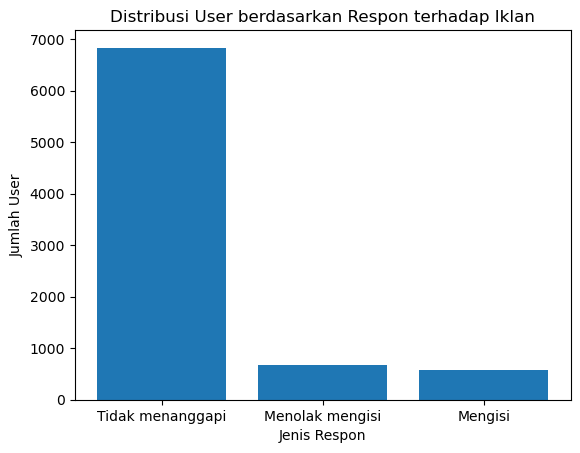

In [31]:
plt.bar(respon.index, respon.values)
plt.xlabel('Jenis Respon')
plt.ylabel('Jumlah User')
plt.title('Distribusi User berdasarkan Respon terhadap Iklan')
plt.show()

In [32]:
total_respon = respon.sum()
respon_percentages = (respon / total_respon) * 100
print(respon_percentages.round(2))

Tidak menanggapi    84.61
Menolak mengisi      8.31
Mengisi              7.08
Name: ad_response, dtype: float64


In [33]:
response_exposed = df[df["experiment"] == 'exposed']["ad_response"].value_counts()
response_exposed

Tidak menanggapi    3349
Menolak mengisi      349
Mengisi              308
Name: ad_response, dtype: int64

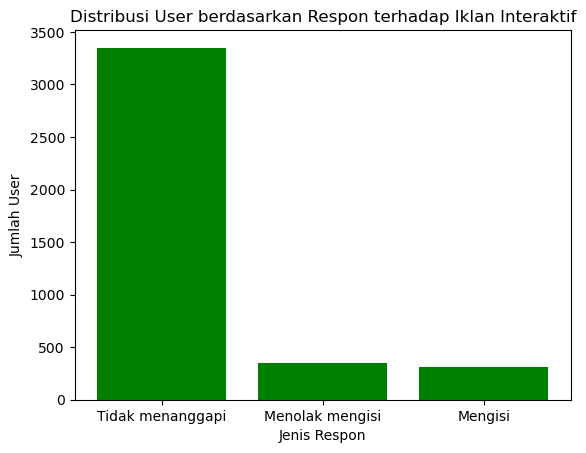

In [34]:
plt.bar(response_exposed.index, response_exposed.values,color=['green'])
plt.xlabel('Jenis Respon')
plt.ylabel('Jumlah User')
plt.title('Distribusi User berdasarkan Respon terhadap Iklan Interaktif')
plt.show()

In [35]:
total_resp_exposed = response_exposed.sum()
resp_exposed_percent = (response_exposed / total_resp_exposed) * 100
print(resp_exposed_percent.round(2))

Tidak menanggapi    83.60
Menolak mengisi      8.71
Mengisi              7.69
Name: ad_response, dtype: float64


In [36]:
response_control = df[df["experiment"] == 'control']["ad_response"].value_counts()
response_control

Tidak menanggapi    3485
Menolak mengisi      322
Mengisi              264
Name: ad_response, dtype: int64

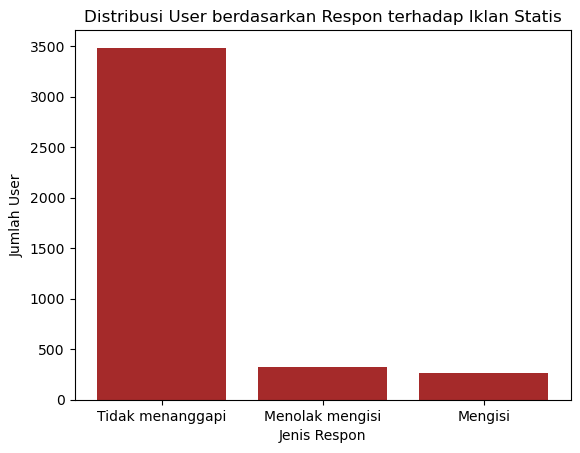

In [37]:
plt.bar(response_control.index, response_control.values,color=['brown'])
plt.xlabel('Jenis Respon')
plt.ylabel('Jumlah User')
plt.title('Distribusi User berdasarkan Respon terhadap Iklan Statis')
plt.show()

In [38]:
total_resp_control = response_control.sum()
resp_control_percent = (response_control / total_resp_control) * 100
print(resp_control_percent.round(2))

Tidak menanggapi    85.61
Menolak mengisi      7.91
Mengisi              6.48
Name: ad_response, dtype: float64


In [39]:
df["fill_quest"]= 1 * (df["yes"] == 1)

In [40]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,browser_type,ad_response,fill_quest
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,Chrome,Tidak menanggapi,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,Chrome,Tidak menanggapi,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,Chrome,Menolak mengisi,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,Facebook,Tidak menanggapi,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Chrome,Tidak menanggapi,0


In [41]:
delete_col = ['device_make', 'platform_os', 'yes', 'no']
data = df.drop(columns=delete_col)

In [42]:
data.head()

,auction_id,experiment,date,hour,browser,browser_type,ad_response,fill_quest
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Chrome Mobile,Chrome,Tidak menanggapi,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Chrome Mobile,Chrome,Tidak menanggapi,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,Chrome Mobile WebView,Chrome,Menolak mengisi,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Facebook,Facebook,Tidak menanggapi,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Chrome Mobile,Chrome,Tidak menanggapi,0


### Pengelompokkan data Control dan Exposed

In [43]:
d_control = data[data["experiment"]=='control']
d_exposed = data[data["experiment"]=='exposed']

In [44]:
#Menghitung jumlah sampel untuk tiap varian data
n_control = d_control.shape[0]
n_exposed = d_exposed.shape[0]
n_total = data.shape[0]

In [45]:
#Menghitung persentase sampel untuk tiap varian data
perc_control = n_control/n_total*100
perc_exposed = n_exposed/n_total*100

In [46]:
print(f"Jumlah data user varian control : {perc_control:.2f}%")
print(f"Jumlah data user varian exposed : {perc_exposed:.2f}%")

Jumlah data user varian control : 50.40%
Jumlah data user varian exposed : 49.60%


### Cek Sampling Ratio Mismatch dengan Chi- Squared test

H0 : Tidak terdapat Sampling Ratio Mismatch

H1 : Terdapat Sampling Ratio Mismatch

In [47]:
#Menghitung total observasi dan sampel yang diharapkan (50:50)
observed = [n_control, n_exposed]
total_traffic= sum(observed)
expected = [ total_traffic/2, total_traffic/2 ]

In [48]:
#Menghitung chi-square statistics
from scipy.stats import chisquare
chi,_ = chisquare(observed, f_exp=expected)
print(chi)

0.5230902562832735


In [49]:
alpha = 0.01
df=(2-1)*(2-1)

import scipy
#Menghitung chi-square critical
chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value: {chi_critical:.3f}")

Critical value: 6.635


In [50]:
pvalue = scipy.stats.chi2.sf(chi,df)
print(f"P value: {pvalue:.3f}")

P value: 0.470


In [51]:
#Merumuskan aturan keputusan berdasarkan nilai chi-square
if chi > chi_critical:
  print("Reject H0 : SRM may be present.")
else:
  print("Fail to reject H0 : No SRM")

Fail to reject H0 : No SRM


In [52]:
#Merumuskan aturan keputusan berdasarkan perbandingan nilai P-Value dengan alpha.
if pvalue < alpha:
    print('Reject H0 : SRM may be present.')
else:
    print('Fail to reject H0 : No SRM.')

Fail to reject H0 : No SRM.


### Melakukan A/B Testing

#### Mendefinisikan Hipotesis

H0 : BIO Questionnaire response_rates pada Online Interactive Ads ≤ Static Ads

H1 : BIO Questionnaire response_rates pada Online Interactive Ads > Static Ads

In [53]:
def extract_evaluation(data):
    # Number of session
    n_session = int(data.shape[0])

    # Number of fill
    n_fill = int(data["fill_quest"].sum())

    # response_rate (in percent)
    response_rate = (n_fill/n_session) * 100

    # Return results
    results = {}
    results["session"] = n_session
    results["n_questionnaire_filled"] = n_fill
    results["response_rate"] = np.round(response_rate, 2)

    return results

In [54]:
control_result = extract_evaluation(data = d_control)
exposed_result = extract_evaluation(data = d_exposed)

In [55]:
print(f"CONTROL: {control_result}")
print(f"EXPOSED: {exposed_result}")

CONTROL: {'session': 4071, 'n_questionnaire_filled': 264, 'response_rate': 6.48}
EXPOSED: {'session': 4006, 'n_questionnaire_filled': 308, 'response_rate': 7.69}


In [56]:
result1 = pd.DataFrame(data = [control_result,
                                      exposed_result],
                              index = ["Control", "Exposed"])
result1

,session,n_questionnaire_filled,response_rate
Control,4071,264,6.48
Exposed,4006,308,7.69


In [57]:
lift = exposed_result["response_rate"] - control_result["response_rate"]
lift

1.21

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_8312\385534412.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=["control", "exposed"], fontsize=16)


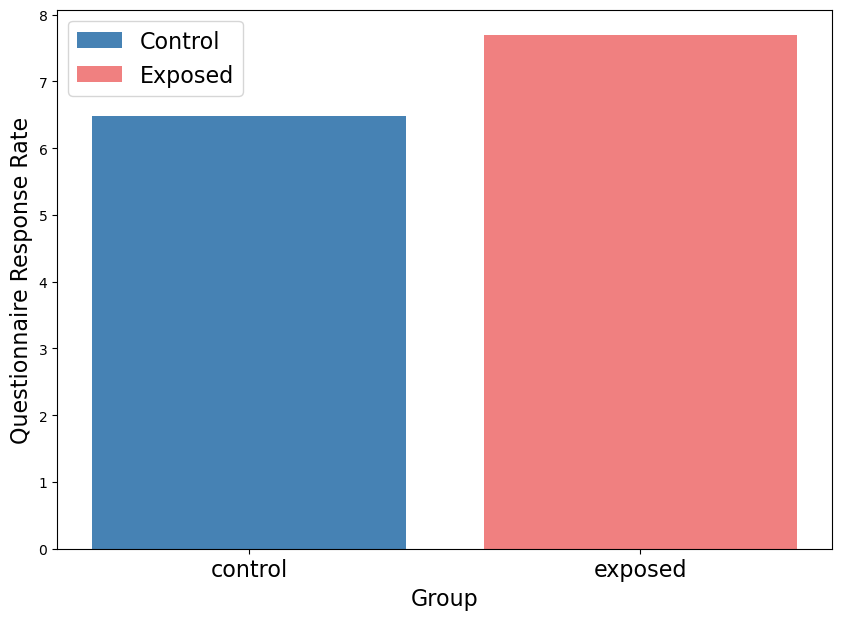

In [58]:
# visualisasi perbandingan Questionnaire filled rate tiap varian
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Buat plot
ax.bar("Control", control_result["response_rate"], color="steelblue", label="Control")
ax.bar("Exposed", exposed_result["response_rate"], color="lightcoral", label="Exposed")

# Styling plot
ax.set_ylabel("Questionnaire Response Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "exposed"], fontsize=16)
ax.legend(fontsize=16)
plt.show()

In [59]:
#Mendefinisikan function untuk melakukan Uji Statistik menghitung p-value
def calculate_pval(exposed,control):
    counts = [exposed_result["n_questionnaire_filled"], control_result["n_questionnaire_filled"]]
    obs = [exposed_result["session"], control_result["session"]]

    zstat, pval = proportion.proportions_ztest(count = counts,
                                           nobs = obs,
                                           alternative = "larger")
    return zstat, pval

In [60]:
zstat, pval = calculate_pval(exposed = exposed_result,
                       control = control_result)

In [61]:
pval

0.017502912984162258

In [62]:
#Merumuskan aturan keputusan berdasarkan p_value dan alpha
alpha = 0.05
if pval < alpha:
    print("Tolak H0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H0")

Tolak H0


In [63]:
zstat

2.108290999972843

In [64]:
z_critical = stats.norm.ppf(1-alpha)

In [65]:
z_critical

1.6448536269514722

In [66]:
#Merumuskan aturan keputusan berdasarkan Z statistics dan Z critical
if zstat > z_critical:
    print("Tolak H0")
else:
    print("Tidak memiliki bukti cukup untuk menolak H0")

Tolak H0


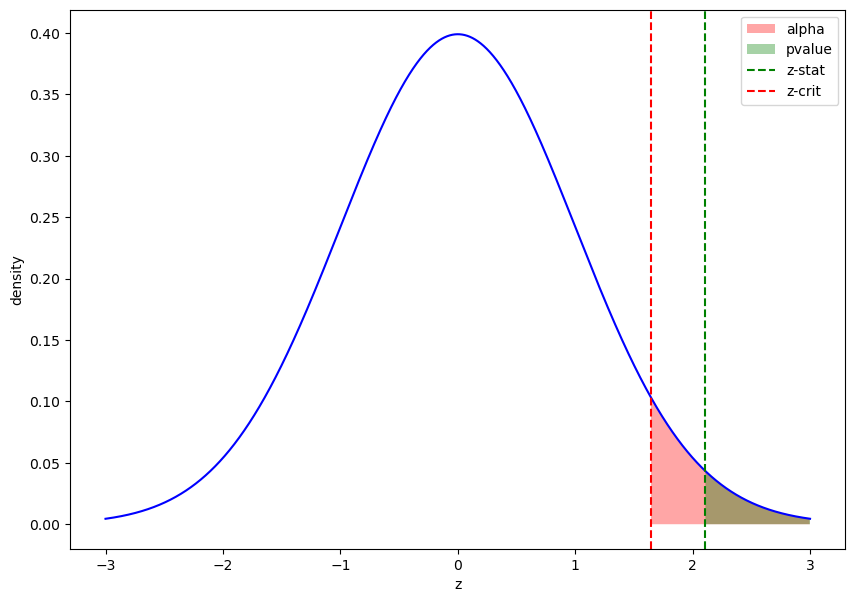

z statistics : 2.1083
z critical : 1.6449


In [67]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot sample distribution
x = np.arange(-3, 3, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1),
         color='blue')

# plot alpha region
x_alpha = np.arange(z_critical,3, 0.01)
y_alpha = stats.norm.pdf(x_alpha)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(zstat,3, 0.01)
y_pvalue = stats.norm.pdf(x_pvalue)
plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot z-crit and z-stats
plt.axvline(np.round(zstat, 3),
            color ="green",
            linestyle = "--",
            label ="z-stat")

plt.axvline(z_critical,
            color ="red",
            linestyle = "--",
            label ="z-crit")

plt.legend()
plt.xlabel("z")
plt.ylabel("density")
plt.show()

print(f"z statistics : {zstat:.4f}")
print(f"z critical : {z_critical:.4f}")

In [68]:
from statsmodels.stats.proportion import confint_proportions_2indep

confidence_interval = confint_proportions_2indep(count1 = exposed_result["n_questionnaire_filled"],
                                                 nobs1 = exposed_result["session"],
                                                 count2 = control_result["n_questionnaire_filled"],
                                                 nobs2 = control_result["session"],
                                                 compare='diff', alpha=0.05)
print(confidence_interval)

(0.0008398362969589592, 0.023274457406590773)


Berdasarkan hasil tersebut, kita yakin 95% bahwa selisih atau difference proporsi user yang mengisi kuisioner (response_rate) pada grup exposed dan control terletak antara 0.08% dan 2,32%.

Berdasarkan hasil statistical test hasilnya adalah statistically significant, namun untuk membuat keputusan apakah akan menggunakan iklan interaktif atau tidak, harus dipastikan apakah secara practically sigificant seperti biaya untuk menerapkan iklan interaktif

In [69]:
#Membuat fungsi untuk menentukan posterior distribution
def generate_posterior(results):
    n_trial = results["session"]
    n_success = results["n_questionnaire_filled"]
    n_fail = n_trial - n_success
    posterior = stats.beta.rvs(a = 1 + n_success,
                               b = 1 + (n_trial-n_success),
                               size = 10_000)
    return posterior

In [70]:
#Menghitung posterior untuk varian control dan exposed
control_posterior = generate_posterior(results = control_result)
exposed_posterior = generate_posterior(results = exposed_result)

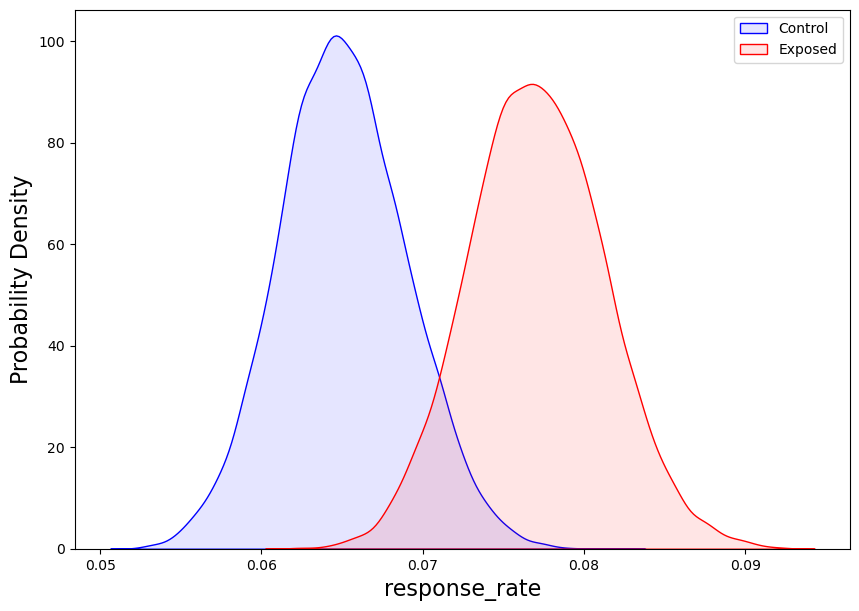

In [71]:
#Plot Hasil
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

sns.kdeplot(data = control_posterior,
            color = "blue",
            label = "Control",
            fill = True,
            alpha = 0.1,
            ax = ax)
sns.kdeplot(data = exposed_posterior,
            color = "red",
            label = "Exposed",
            fill = True,
            alpha = 0.1,
            ax = ax)

ax.set_ylabel("Probability Density", fontsize=16)
ax.set_xlabel("response_rate", fontsize=16)
plt.legend()
plt.show()

response_rate varian exposed > kontrol karena grafik exposed ada di sebelah kanan

In [72]:
exposed_win = exposed_posterior-control_posterior

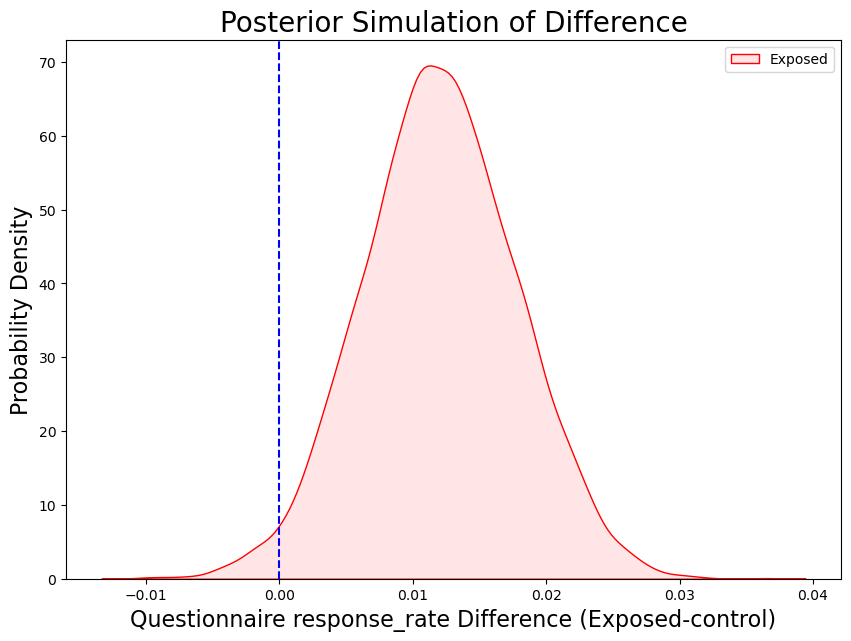

In [73]:
# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

sns.kdeplot(data = exposed_win,
            color = "red",
            label = "Exposed",
            fill = True,
            alpha = 0.1,
            ax = ax)
ax.axvline(0.0000, color = "blue", linestyle="--")

ax.set_title("Posterior Simulation of Difference", fontsize=20)
ax.set_ylabel("Probability Density", fontsize=16)
ax.set_xlabel("Questionnaire response_rate Difference (Exposed-control)", fontsize=16)
plt.legend()
plt.show()

In [74]:
# Menghitung probability to be best (pbb) - dalam percent
exposed_pbb = (exposed_win > 0.0).mean() * 100
exposed_pbb

98.19

In [75]:
#Menghitung pbb control
control_pbb = 100 - exposed_pbb
control_pbb

1.8100000000000023

In [76]:
#Menambahkan hasil PBB ke data control dan exposed
control_result["PBB"] = control_pbb
exposed_result["PBB"] = exposed_pbb

In [77]:
print(f"CONTROL: {control_result}")
print(f"TREATMENT: {exposed_result}")

CONTROL: {'session': 4071, 'n_questionnaire_filled': 264, 'response_rate': 6.48, 'PBB': 1.8100000000000023}
TREATMENT: {'session': 4006, 'n_questionnaire_filled': 308, 'response_rate': 7.69, 'PBB': 98.19}


In [78]:
summary_data = pd.DataFrame(data = [control_result, exposed_result], index = ["Control", "Exposed"])

In [79]:
summary_data

,session,n_questionnaire_filled,response_rate,PBB
Control,4071,264,6.48,1.81
Exposed,4006,308,7.69,98.19


### Menggabungkan seluruh fungsi

In [80]:
#Mendefinisikan function untuk mengelompokkan data tiap varian
def split_data(data):
    data = data.copy()
    df_control = data[data["experiment"]=='control']
    df_exposed = data[data["experiment"]=='exposed']
    return df_control, df_exposed

In [81]:
#Mendefinisikan function untuk menghitung metrik yang diamati
def extract_evaluation(data):
    # Number of session
    n_session = int(data.shape[0])

    # Number of fill
    n_fill = int(data["fill_quest"].sum())

    # response_rate (in percent)
    response_rate = (n_fill/n_session) * 100

    # Return results
    results = {}
    results["session"] = n_session
    results["n_questionnaire_filled"] = n_fill
    results["response_rate"] = np.round(response_rate, 2)

    return results

In [82]:
#Mendefinisikan function untuk melakukan Uji Statistik menghitung p-value
def calculate_pval(exposed_result,control_result):
    counts = [exposed_result["n_questionnaire_filled"], control_result["n_questionnaire_filled"]]
    obs = [exposed_result["session"], control_result["session"]]

    _,pvalue = proportion.proportions_ztest(count = counts,
                                           nobs = obs,
                                           alternative = "larger")
    return pvalue

In [83]:
#Mendefinisikan function untuk menentukan posterior distribution
def generate_posterior(results):
    n_trial = results["session"]
    n_success = results["n_questionnaire_filled"]
    n_fail = n_trial - n_success
    posterior = stats.beta.rvs(a = 1 + n_success,
                               b = 1 + (n_trial-n_success),
                               size = 10_000)
    return posterior

In [84]:
def calculate_pbb(control_result, exposed_result):
    # Menghitung posterior masing-masing varian
    control_posterior = generate_posterior(results = control_result)
    exposed_posterior = generate_posterior(results = exposed_result)

    #Menghitung winner varian exposed
    exposed_win = exposed_posterior-control_posterior

    #Menghitung probability to be best
    exposed_pbb = (exposed_win > 0.0).mean() * 100
    control_pbb = 100 - exposed_pbb

    #Menambahkan hasil PBB ke data control dan exposed
    control_result["PBB"] = control_pbb
    exposed_result["PBB"] = exposed_pbb

    return control_result, exposed_result


In [85]:
def summary_results(data):
    #Pengelompokan data tiap varian
    df_control, df_exposed = split_data(data = data)

    #Menghitung metrik yang akan dievaluasi
    control_result = extract_evaluation(data = df_control)
    exposed_result = extract_evaluation(data = df_exposed)

    # Menghitung lift over baseline (uplift) -- absolute in percent
    lift = exposed_result["response_rate"] - control_result["response_rate"]
    control_result["lift"] = "---"
    exposed_result["lift"] = np.round(lift, 2)

    #Menghitung p-value
    pvalue = calculate_pval(exposed_result = exposed_result,
                       control_result = control_result)
    control_result["p-value"] = "---"
    exposed_result["p-value"] = np.round(pvalue, 2)

    #Menghitung Probability to Be Best (PBB)
    control_result, exposed_result = calculate_pbb(control_result = control_result,
                                               exposed_result = exposed_result)

    #Membuat dataframe
    summary_df = pd.DataFrame(data = [control_result,
                                      exposed_result],
                              index = ["Control", "Exposed"])

    return summary_df

In [86]:
summary_results(data = data)

,session,n_questionnaire_filled,response_rate,lift,p-value,PBB
Control,4071,264,6.48,---,---,1.72
Exposed,4006,308,7.69,1.21,0.02,98.28


In [87]:
data["browser_type"].value_counts()

Chrome              6097
Samsung Internet     824
Facebook             764
Safari               381
Others                11
Name: browser_type, dtype: int64

In [88]:
summary_results(data = data[data["browser_type"] == "Chrome"])

,session,n_questionnaire_filled,response_rate,lift,p-value,PBB
Control,2737,163,5.96,---,---,0.07
Exposed,3360,269,8.01,2.05,0.0,99.93


In [89]:
summary_results(data = data[data["browser_type"] == "Samsung Internet"])

,session,n_questionnaire_filled,response_rate,lift,p-value,PBB
Control,492,45,9.15,---,---,90.01
Exposed,332,22,6.63,-2.52,0.9,9.99


In [90]:
summary_results(data = data[data["browser_type"] == "Facebook"])

,session,n_questionnaire_filled,response_rate,lift,p-value,PBB
Control,561,53,9.45,---,---,72.52
Exposed,203,16,7.88,-1.57,0.75,27.48


In [91]:
summary_results(data = data[data["browser_type"] == "Safari"])

,session,n_questionnaire_filled,response_rate,lift,p-value,PBB
Control,276,3,1.09,---,---,43.16
Exposed,105,1,0.95,-0.14,0.55,56.84


In [92]:
summary_results(data = data[data["browser_type"] == "Others"])

C:\Users\Microsoft\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


,session,n_questionnaire_filled,response_rate,lift,p-value,PBB
Control,5,0,0.0,---,---,54.31
Exposed,6,0,0.0,0.0,NaN,45.69
